# Superstores Sales - Python Script

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Chargement du fichier CSV Superstor
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Affichage des infos générales sur les colonnes et types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Nettoyage des noms de colonnes : suppression des espaces, mise en minuscule et remplacer espace par underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [5]:
# Suppression des doublons s'il y en a
df = df.drop_duplicates()

In [6]:
#Vérification des valeurs manquantes
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [7]:
# Conversion des colonnes de date au bon format
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [8]:
# Extraction de l'année et du mois de commande
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [9]:
# Vérification de la cohérence des valeurs numériques
df[['sales', 'profit', 'quantity', 'discount']].describe()

,sales,profit,quantity,discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


In [22]:
# Fonction pour détecter les colonnes candidates à une clé primaire
def find_primary_key_candidates(df):
    primary_keys = []
    for column in df.columns:
        if df[column].is_unique and not df[column].isnull().any():
            primary_keys.append(column)
    return primary_keys


### Visualisation des données

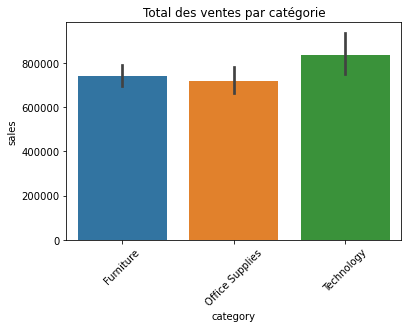

In [10]:
# Barplot des ventes par catégorie
sns.barplot(data=df, x='category', y ='sales', estimator=sum)
plt.title("Total des ventes par catégorie")
plt.xticks(rotation=45)
plt.show()

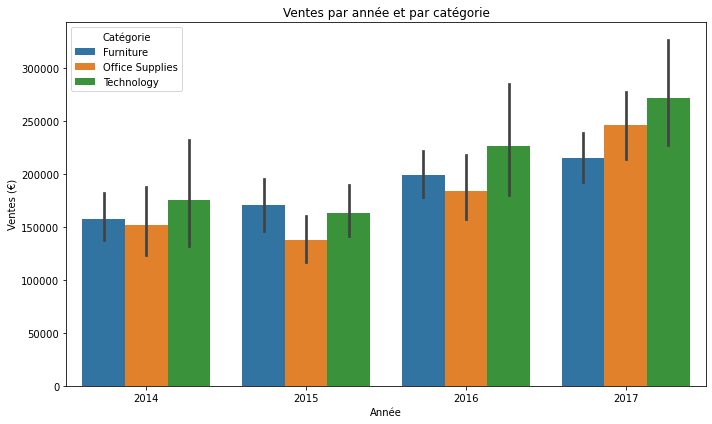

In [11]:
#Ventes par année et par catégorie
# Tracer l'histogramme groupé
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='order_year', y='sales', hue='category', estimator=sum)
plt.title("Ventes par année et par catégorie")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.legend(title="Catégorie")
plt.tight_layout()
plt.show()

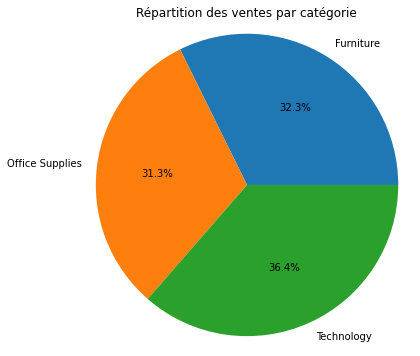

In [12]:
# Regrouper les ventes par catégorie
category_sales = df.groupby('category')['sales'].sum()

# Création du camembert
plt.figure(figsize=(6, 6))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
)
plt.title("Répartition des ventes par catégorie")
plt.axis('equal')
plt.show()



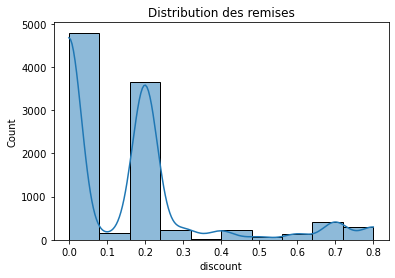

In [13]:
# Histogramme des remises
sns.histplot(df['discount'], bins=10, kde=True)
plt.title("Distribution des remises")
plt.show()

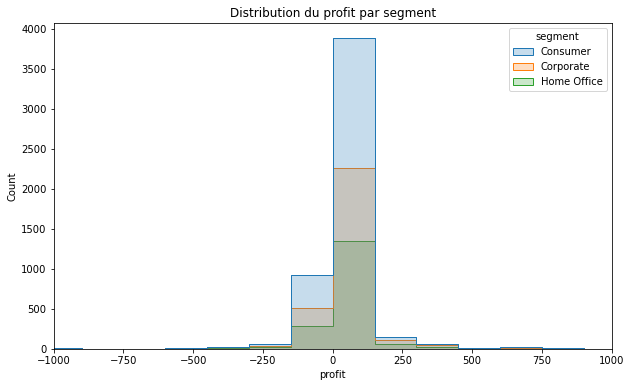

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='profit', hue='segment', element='step', common_norm=False, bins=100)
plt.title("Distribution du profit par segment")
plt.xlim(-1000, 1000)
plt.show()

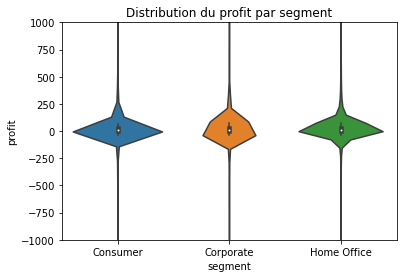

In [15]:
sns.violinplot(data=df, x='segment', y='profit')
plt.title("Distribution du profit par segment")
plt.ylim(-1000, 1000)
plt.show()

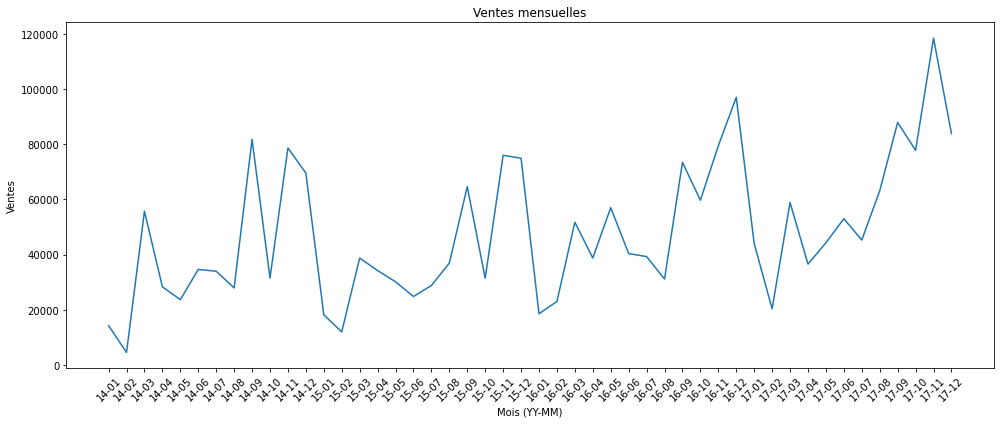

In [16]:
# Lineplot des ventes par mois


# Création d'une colonne au format YY-MM
df['order_yy_mm'] = df['order_date'].dt.strftime('%y-%m')

# Regroupement des ventes par mois
df_monthly = df.groupby('order_yy_mm')['sales'].sum().reset_index()

# Affichage du graphique
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_monthly, x='order_yy_mm', y='sales')

plt.title("Ventes mensuelles")
plt.xlabel("Mois (YY-MM)")
plt.ylabel("Ventes")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## Traitement pour import SQL

In [17]:
# Remplacement des caractères spéciaux qui pourraient gêner l'import SQL
df = df.replace("'", "", regex=True)

In [18]:
# Export du fichier nettoyé pour l'import dans SQL Server
df.to_csv("superstore_dataset_clean.csv", index=False)

In [23]:
# Appel de la fonction find primary key candidates
pk_candidates = find_primary_key_candidates(df)

# Affichage
print("Colonnes candidates à être des clés primaires :")
for col in pk_candidates:
    print(f"- {col}")

Colonnes candidates à être des clés primaires :
- Row ID
